In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


df = pd.read_csv('students_cleaned_150.csv')
df.dropna(inplace=True)
df_small = df.sample(50, random_state=42)  

# REGRESSION PLOT
A regression plot in Seaborn shows a scatter plot + best-fit line (and usually a confidence band). It’s great for checking if two variables move together.

correlation r - measures the linear relationship between two quantitative variables with respect to direction and strength... values between -1 and 1


r-square is a measure of how close each data point fits to the regression line, has a value between 0 and 1

<Axes: xlabel='AttendancePct', ylabel='MathScore'>

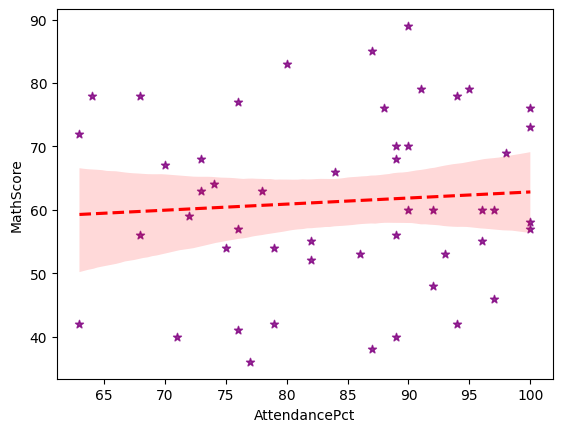

In [18]:
sns.regplot(data=df_small, x='AttendancePct', y='MathScore', 
             color='green',
             marker="*", 
             line_kws={'color':'red', 'linestyle': '--'}, 
             scatter_kws=dict(color='purple'),
            #  ci=None
             )

# Heat Map 

A graphical representation of data where values are depicted by color 

In [20]:
df_small.columns = df_small.columns.str.lower()

In [42]:
df_smallPi = df_small.pivot_table(index='studentid', columns='classlevel', values='attendancepct')
df_smallPi.head()


classlevel,JSS1,JSS2,JSS3,SS1,SS2,SS3
studentid,,,,,,
4511,NaN,NaN,NaN,NaN,76.0,NaN
7133,NaN,NaN,NaN,NaN,79.0,NaN
7138,NaN,NaN,NaN,NaN,NaN,84.0
8853,NaN,NaN,97.0,NaN,NaN,NaN
15670,NaN,94.0,NaN,NaN,NaN,NaN


<Axes: xlabel='classlevel', ylabel='studentid'>

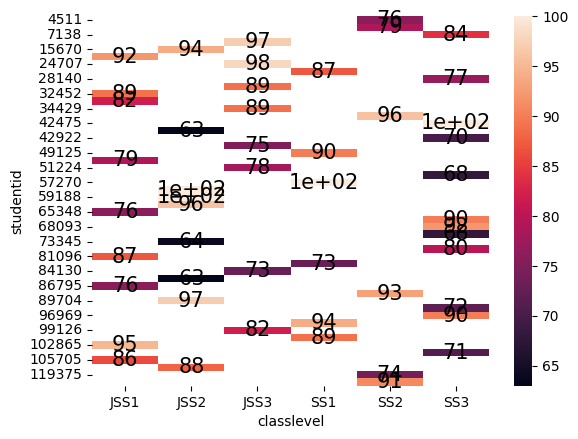

In [41]:
sns.heatmap(data=df_smallPi,
            annot=True,
            annot_kws=dict(size=15, color='black'))

In [51]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 150)

In [ ]:
pivot = pd.pivot_table(df_small, 
                       values='mathscore',
                       index='name',
                       columns='classlevel',
                    #    aggfunc=['mean', 'sum'],
                       fill_value=0,
                       margins=True,  # Add All row/column
                       margins_name='Total'
                       )
pivot.head()

classlevel,JSS1,JSS2,JSS3,SS1,SS2,SS3,Total
name,,,,,,,
Ada Adekunle,52.0,0.0,0.0,0.0,0.0,0.0,52.0
Ada Bello,0.0,0.0,0.0,0.0,57.0,0.0,57.0
Ada Nwosu,0.0,60.0,0.0,0.0,0.0,0.0,60.0
Ada Ogundare,77.0,0.0,0.0,0.0,0.0,59.0,68.0
Ada Okafor,0.0,0.0,55.0,0.0,0.0,0.0,55.0


In [86]:
cross_tab = pd.crosstab(index=df_small['name'], columns=df_small['age'], values=df_small['yearscode'],aggfunc=['mean', 'sum'], margins=True, margins_name='Total')
cross_tab.head()

mean                                                        \
age           10.0  11.0 12.0  13.0 14.0 15.0 16.0  17.0 18.0 19.0 Total   
name                                                                       
Ada Adekunle   NaN   NaN  NaN   0.0  NaN  NaN  NaN   NaN  NaN  NaN   0.0   
Ada Bello      NaN   NaN  NaN  12.0  NaN  NaN  NaN   NaN  NaN  NaN  12.0   
Ada Nwosu      NaN   NaN  NaN   NaN  NaN  NaN  NaN   7.0  NaN  NaN   7.0   
Ada Ogundare   NaN  10.0  NaN   NaN  NaN  NaN  NaN  19.0  NaN  NaN  14.5   
Ada Okafor    17.0   NaN  NaN   NaN  NaN  NaN  NaN   NaN  NaN  NaN  17.0   

               sum                                                        
age           10.0  11.0 12.0  13.0 14.0 15.0 16.0  17.0 18.0 19.0 Total  
name                                                                      
Ada Adekunle   NaN   NaN  NaN   0.0  NaN  NaN  NaN   NaN  NaN  NaN   0.0  
Ada Bello      NaN   NaN  NaN  12.0  NaN  NaN  NaN   NaN  NaN  NaN  12.0  
Ada Nwosu      NaN   NaN  NaN   NaN  NaN  NaN  NaN   7.0  NaN  NaN   7.0  
Ada Ogundare   NaN  10.0  NaN   NaN  NaN  NaN  NaN  19.0  NaN  NaN  29.0  
Ada Okafor    17.0   NaN  NaN   NaN  NaN  NaN  NaN   NaN  NaN  NaN  17.0